In [1]:
#Importing library for dataframe
import pandas as pd
import numpy as np
#Importing library for suppressing warnings
import warnings
warnings.filterwarnings('ignore')
#Importing library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Importing library for train-test data split
from sklearn.model_selection import train_test_split
#Importing library for rescaling the features
from sklearn.preprocessing import MinMaxScaler
# Importing library to calculate r-squared
from sklearn.metrics import r2_score
#Importing RFE and Linear Regression for building model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#Importing statsmodel for adding a constant
import statsmodels.api as sm
#Model deployment
import pickle

In [2]:
#Reading CarPrice csv file from local
car_price = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
#Checking first 5 records of the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
# To display all the columns
pd.set_option('display.max_columns',50)

In [5]:
# To check the records of first 5 in the dataset
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
#To see the number of rows and columns of the dataset
car_price.shape

(205, 26)

In [7]:
# To check if there are any missing entries.
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

Based on above information , there are no missing entries.

In [8]:
# To check the statistical parameters of the numerical columns
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
# Dropping car models from the CarName column to have only the car brand  names
car_price['CarName']=car_price['CarName'].apply(lambda x : x.split(' ')[0])

In [10]:
# To see check first 5 records of the dataframe
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
#To see what are the unique car brand names
car_price['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [12]:
# Renaming CarName values in order to have consistency over car brand names
def car_name_replace(a,b):
    car_price.CarName.replace(a,b,inplace=True)
    
car_name_replace('maxda','mazda')
car_name_replace('porcshce','porsche')
car_name_replace('toyouta','toyota')
car_name_replace('vw','volkswagen')
car_name_replace('vokswagen','volkswagen')
car_name_replace('Nissan','nissan')

In [13]:
#To check the unique car brand names
car_price.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Visualisation

#### Visualising the data for Categorical Variables with Price
1. fueltype
2. aspiration
3. doornumber
4. carbody
5. drivewheel
6. enginelocation
7. enginetype
8. cylindernumber
9. fuelsystem
10. CarName
11. Symboling

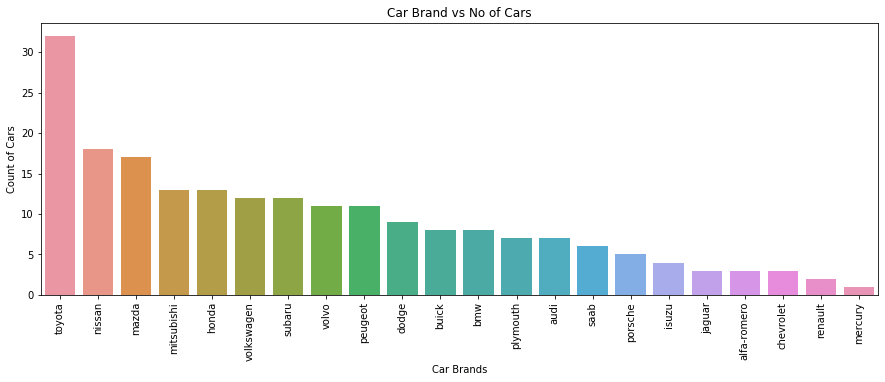

<Figure size 432x288 with 0 Axes>

In [14]:
# To count number of cars for each brand
fig, ax = plt.subplots(figsize = (15,5))
df=sns.countplot(car_price['CarName'],order = car_price['CarName'].value_counts().index)
df.set_xlabel('Car Brands')
df.set_ylabel('Count of Cars')
df.set_title('Car Brand vs No of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

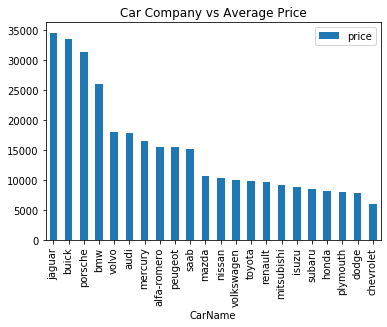

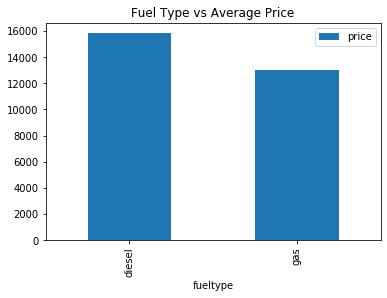

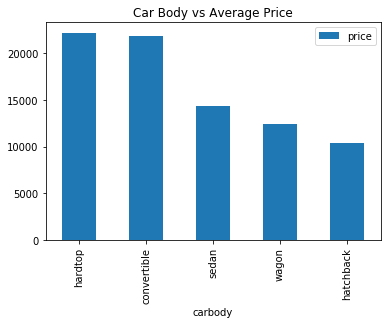

In [15]:
# Plotting barplots for categorical data vs avg price
df=pd.DataFrame(car_price.groupby(['CarName'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Company vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['fueltype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['carbody'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Car Body vs Average Price')
plt.show()

1. Jaguar and Buick are the most expensive brands
2. Diesel cars are more expensive than Gas Cars
3. Hardtop and Convertible are the most expensive cars and hatchback the least.

<Figure size 1080x720 with 0 Axes>

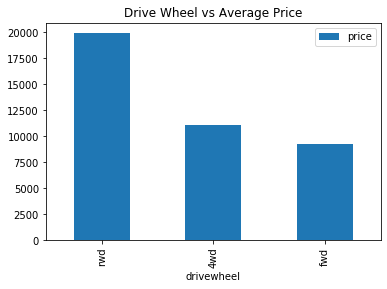

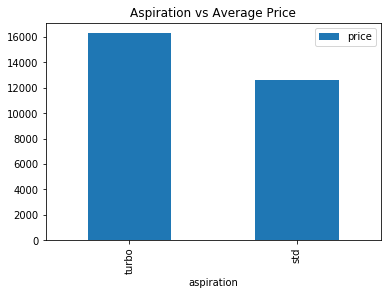

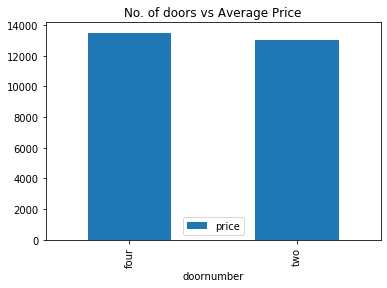

In [16]:
# Plotting barplots for categorical data vs avg price
plt.figure(figsize=(15,10))
df=pd.DataFrame(car_price.groupby(['drivewheel'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Drive Wheel vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['aspiration'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Aspiration vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['doornumber'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('No. of doors vs Average Price')
plt.show()

1. Drivewheel and Aspiration have an impact on the price.
2. Rear wheel drive are the most expensive compared to 4wd and fwd drivewheels
3. Turbo aspiration are pricier than std.
4. The number of doors has no impact on the price.

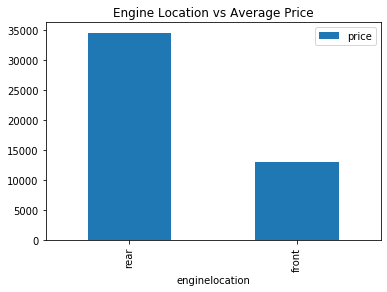

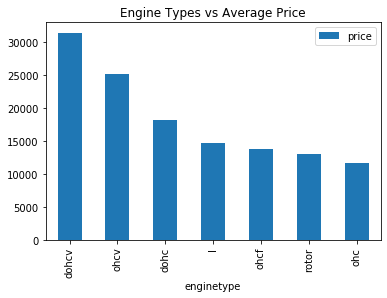

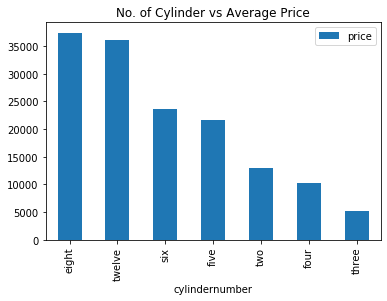

In [17]:
# Plotting barplots for categorical data vs avg price
df=pd.DataFrame(car_price.groupby(['enginelocation'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Engine Location vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['enginetype'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Engine Types vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['cylindernumber'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('No. of Cylinder vs Average Price')
plt.show()

1. Engine Location , Engine Types and No. of Cylinders are all impacting the price of the car
2. Rear Engine Location car models are expensive than front engine types.
3. dochv engine type are the most expensive.
4. Eight and twelve cylinders in a car make the cars expensive.

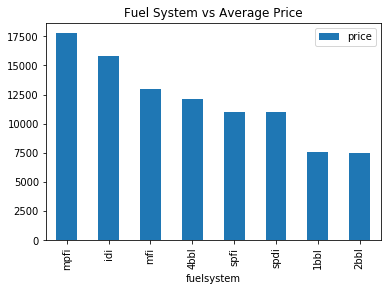

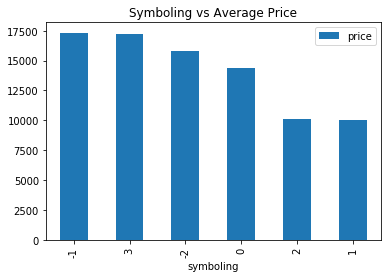

In [18]:
# Plotting barplots for categorical data vs avg price
df=pd.DataFrame(car_price.groupby(['fuelsystem'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Fuel System vs Average Price')
plt.show()

df=pd.DataFrame(car_price.groupby(['symboling'])['price'].mean().sort_values(ascending=False))
df.plot.bar()
plt.title('Symboling vs Average Price')
plt.show()

Fuelsystem and Symboling have impact on price of the car.

#### Visualizing the numerical data with price
1. wheelbase
2. carlength
3. carwidth
4. carheight
5. curbweight
6. enginesize
7. boreratio
8. stroke		
9. compressionratio		
10. horsepower		
11. peakrpm		
12. citympg		
13. highwaympg
14. price

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

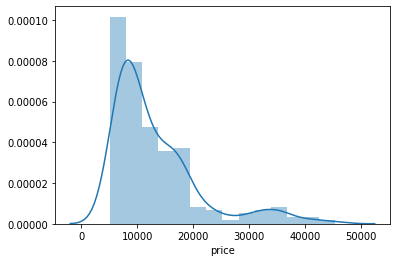

In [19]:
# Checking statistical parameters of the column price of the dataframe
sns.distplot(car_price['price'])
car_price['price'].describe()

1. Most of the cars are priced less than 10000.
2. There is a huge difference between the mean and median of the car prices
3. There is a huge variance in the car prices.

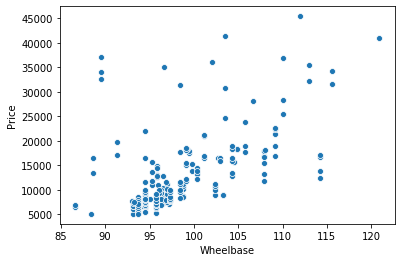

In [20]:
#Wheel base vs Price 
df=sns.scatterplot(x='wheelbase',y='price',data=car_price)
df.set_xlabel('Wheelbase')
df.set_ylabel('Price')
plt.show()

There seems to be correlation of Wheelbase with the price of the car.

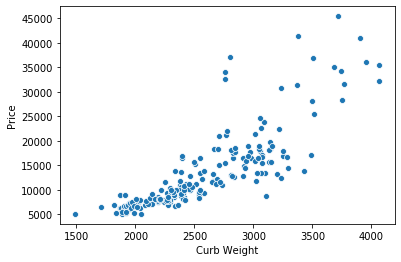

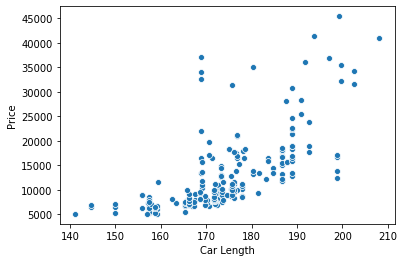

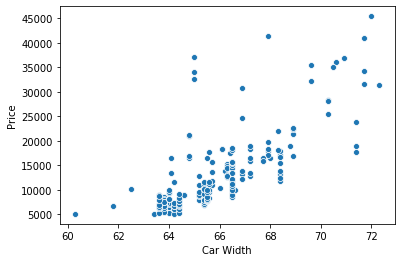

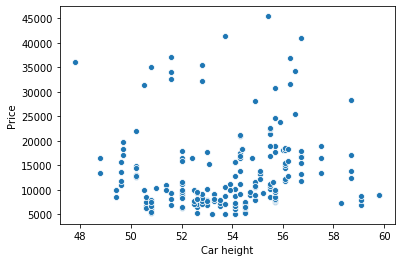

In [21]:
#Plotting Car Size features with the price of the cars.
df=sns.scatterplot(x='curbweight',y='price',data=car_price)
df.set_xlabel('Curb Weight')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='carlength',y='price',data=car_price)
df.set_xlabel('Car Length')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='carwidth',y='price',data=car_price)
df.set_xlabel('Car Width')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='carheight',y='price',data=car_price)
df.set_xlabel('Car height')
df.set_ylabel('Price')
plt.show()

1. Curbweight,Car Length and Car Width seem to have correlation with the Price
2. There is no significant correlation of Car height with the price.

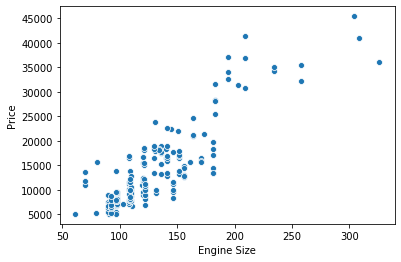

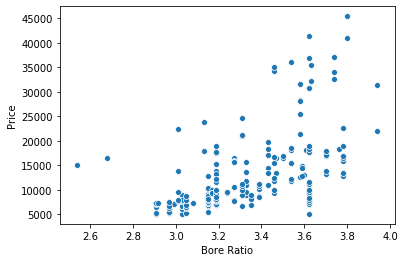

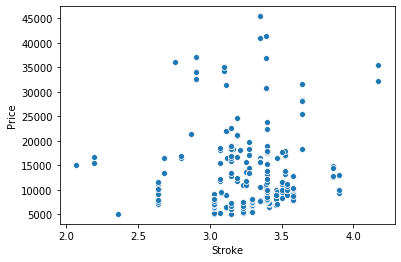

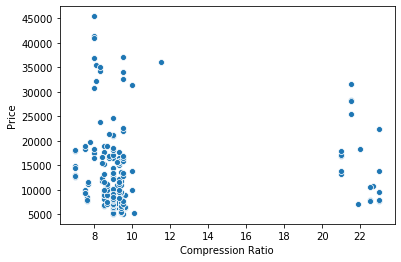

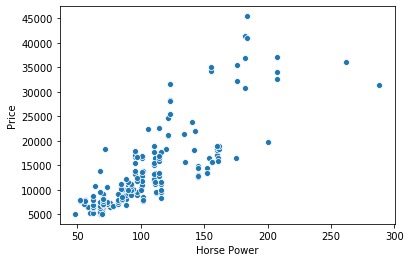

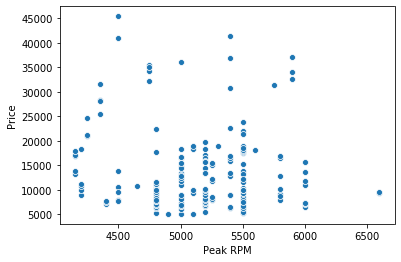

In [22]:
#Engine features vs price
df=sns.scatterplot(x='enginesize',y='price',data=car_price)
df.set_xlabel('Engine Size')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='boreratio',y='price',data=car_price)
df.set_xlabel('Bore Ratio')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='stroke',y='price',data=car_price)
df.set_xlabel('Stroke')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='compressionratio',y='price',data=car_price)
df.set_xlabel('Compression Ratio')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='horsepower',y='price',data=car_price)
df.set_xlabel('Horse Power')
df.set_ylabel('Price')
plt.show()

df=sns.scatterplot(x='peakrpm',y='price',data=car_price)
df.set_xlabel('Peak RPM')
df.set_ylabel('Price')
plt.show()

1. Engine Size, Bore ratio and Horse Power have a correlation with the price of the car
2. Peak RPM,Compression Ratio and Stroke have no correlation with the price of the car


In [23]:
# Creating a common column mileage on putting a formula of citympg*0.55+ highwaympg*0.45
car_price['mileage']=car_price['citympg']*0.55 + car_price['highwaympg']*0.45

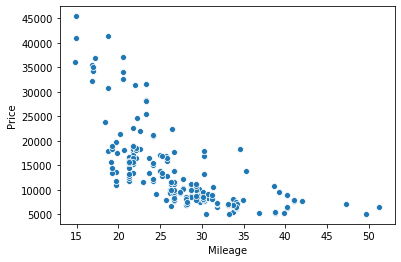

In [24]:
#Mileage vs Car prices
df=sns.scatterplot(x='mileage',y='price',data=car_price)
df.set_xlabel('Mileage')
df.set_ylabel('Price')
plt.show()

Mileage has negative correlation with the price of the car.

In [25]:
#Categorizing the price of the cars into 3 categories - Economy,Standard,Luxury
car_price['pricecategory']=car_price['price'].apply(lambda x : "Economy" if x < 10000 else ("Standard" if 10000<=x<30000 else "Luxury"))

In [26]:
# Showing random 10 data with different brand category
car_price.sample(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,pricecategory
169,170,2,toyota,gas,std,two,hatchback,rwd,front,98.4,176.2,65.6,52.0,2551,ohc,four,146,mpfi,3.62,3.50,9.3,116,4800,24,30,9989.0,26.70,Economy
126,127,3,porsche,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0,20.60,Luxury
133,134,2,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2695,ohc,four,121,mpfi,3.54,3.07,9.3,110,5250,21,28,12170.0,24.15,Standard
94,95,1,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1951,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,7299.0,33.70,Economy
80,81,3,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,173.0,65.4,49.4,2370,ohc,four,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0,26.15,Economy
199,200,-1,volvo,gas,turbo,four,wagon,rwd,front,104.3,188.8,67.2,57.5,3157,ohc,four,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950.0,19.25,Standard
91,92,1,nissan,gas,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,1918,ohc,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6649.0,33.70,Economy
128,129,3,porsche,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0,20.60,Luxury
63,64,0,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0,38.70,Standard
137,138,2,saab,gas,turbo,four,sedan,fwd,front,99.1,186.6,66.5,56.1,2847,dohc,four,121,mpfi,3.54,3.07,9.0,160,5500,19,26,18620.0,22.15,Standard


## Linear Regression

 Based on the multiple graph plots of numerical and categorical data vs price we conclude that the below variables have correlation with price

1. fueltype
2. carbody
3. drivewheel
4. aspiration
5. enginelocation
6. enginetype
7. cylindernumber
8. fuelsystem
9. symboling
10. wheelbase
11. curbweight
12. carlength
13. carwidth
14. carheight
15. enginesize
16. boreratio
17. horsepower
18. mileage
19. pricecategory

In [27]:
#The model based on the analysis done on the variables with respective to the price of the car
price_lr=car_price[['fueltype',
'carbody',
'drivewheel',
'aspiration',
'enginelocation',
'enginetype',
'cylindernumber',
'fuelsystem',
'wheelbase',
'curbweight',
'carlength',
'carwidth',
'carheight',
'enginesize',
'boreratio',
'horsepower',
'pricecategory',
'mileage',
'price']]

In [28]:
price_lr.head()

,fueltype,carbody,drivewheel,aspiration,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,curbweight,carlength,carwidth,carheight,enginesize,boreratio,horsepower,pricecategory,mileage,price
0,gas,convertible,rwd,std,front,dohc,four,mpfi,88.6,2548,168.8,64.1,48.8,130,3.47,111,Standard,23.70,13495.0
1,gas,convertible,rwd,std,front,dohc,four,mpfi,88.6,2548,168.8,64.1,48.8,130,3.47,111,Standard,23.70,16500.0
2,gas,hatchback,rwd,std,front,ohcv,six,mpfi,94.5,2823,171.2,65.5,52.4,152,2.68,154,Standard,22.15,16500.0
3,gas,sedan,fwd,std,front,ohc,four,mpfi,99.8,2337,176.6,66.2,54.3,109,3.19,102,Standard,26.70,13950.0
4,gas,sedan,4wd,std,front,ohc,five,mpfi,99.4,2824,176.6,66.4,54.3,136,3.19,115,Standard,19.80,17450.0


<Figure size 1080x1080 with 0 Axes>

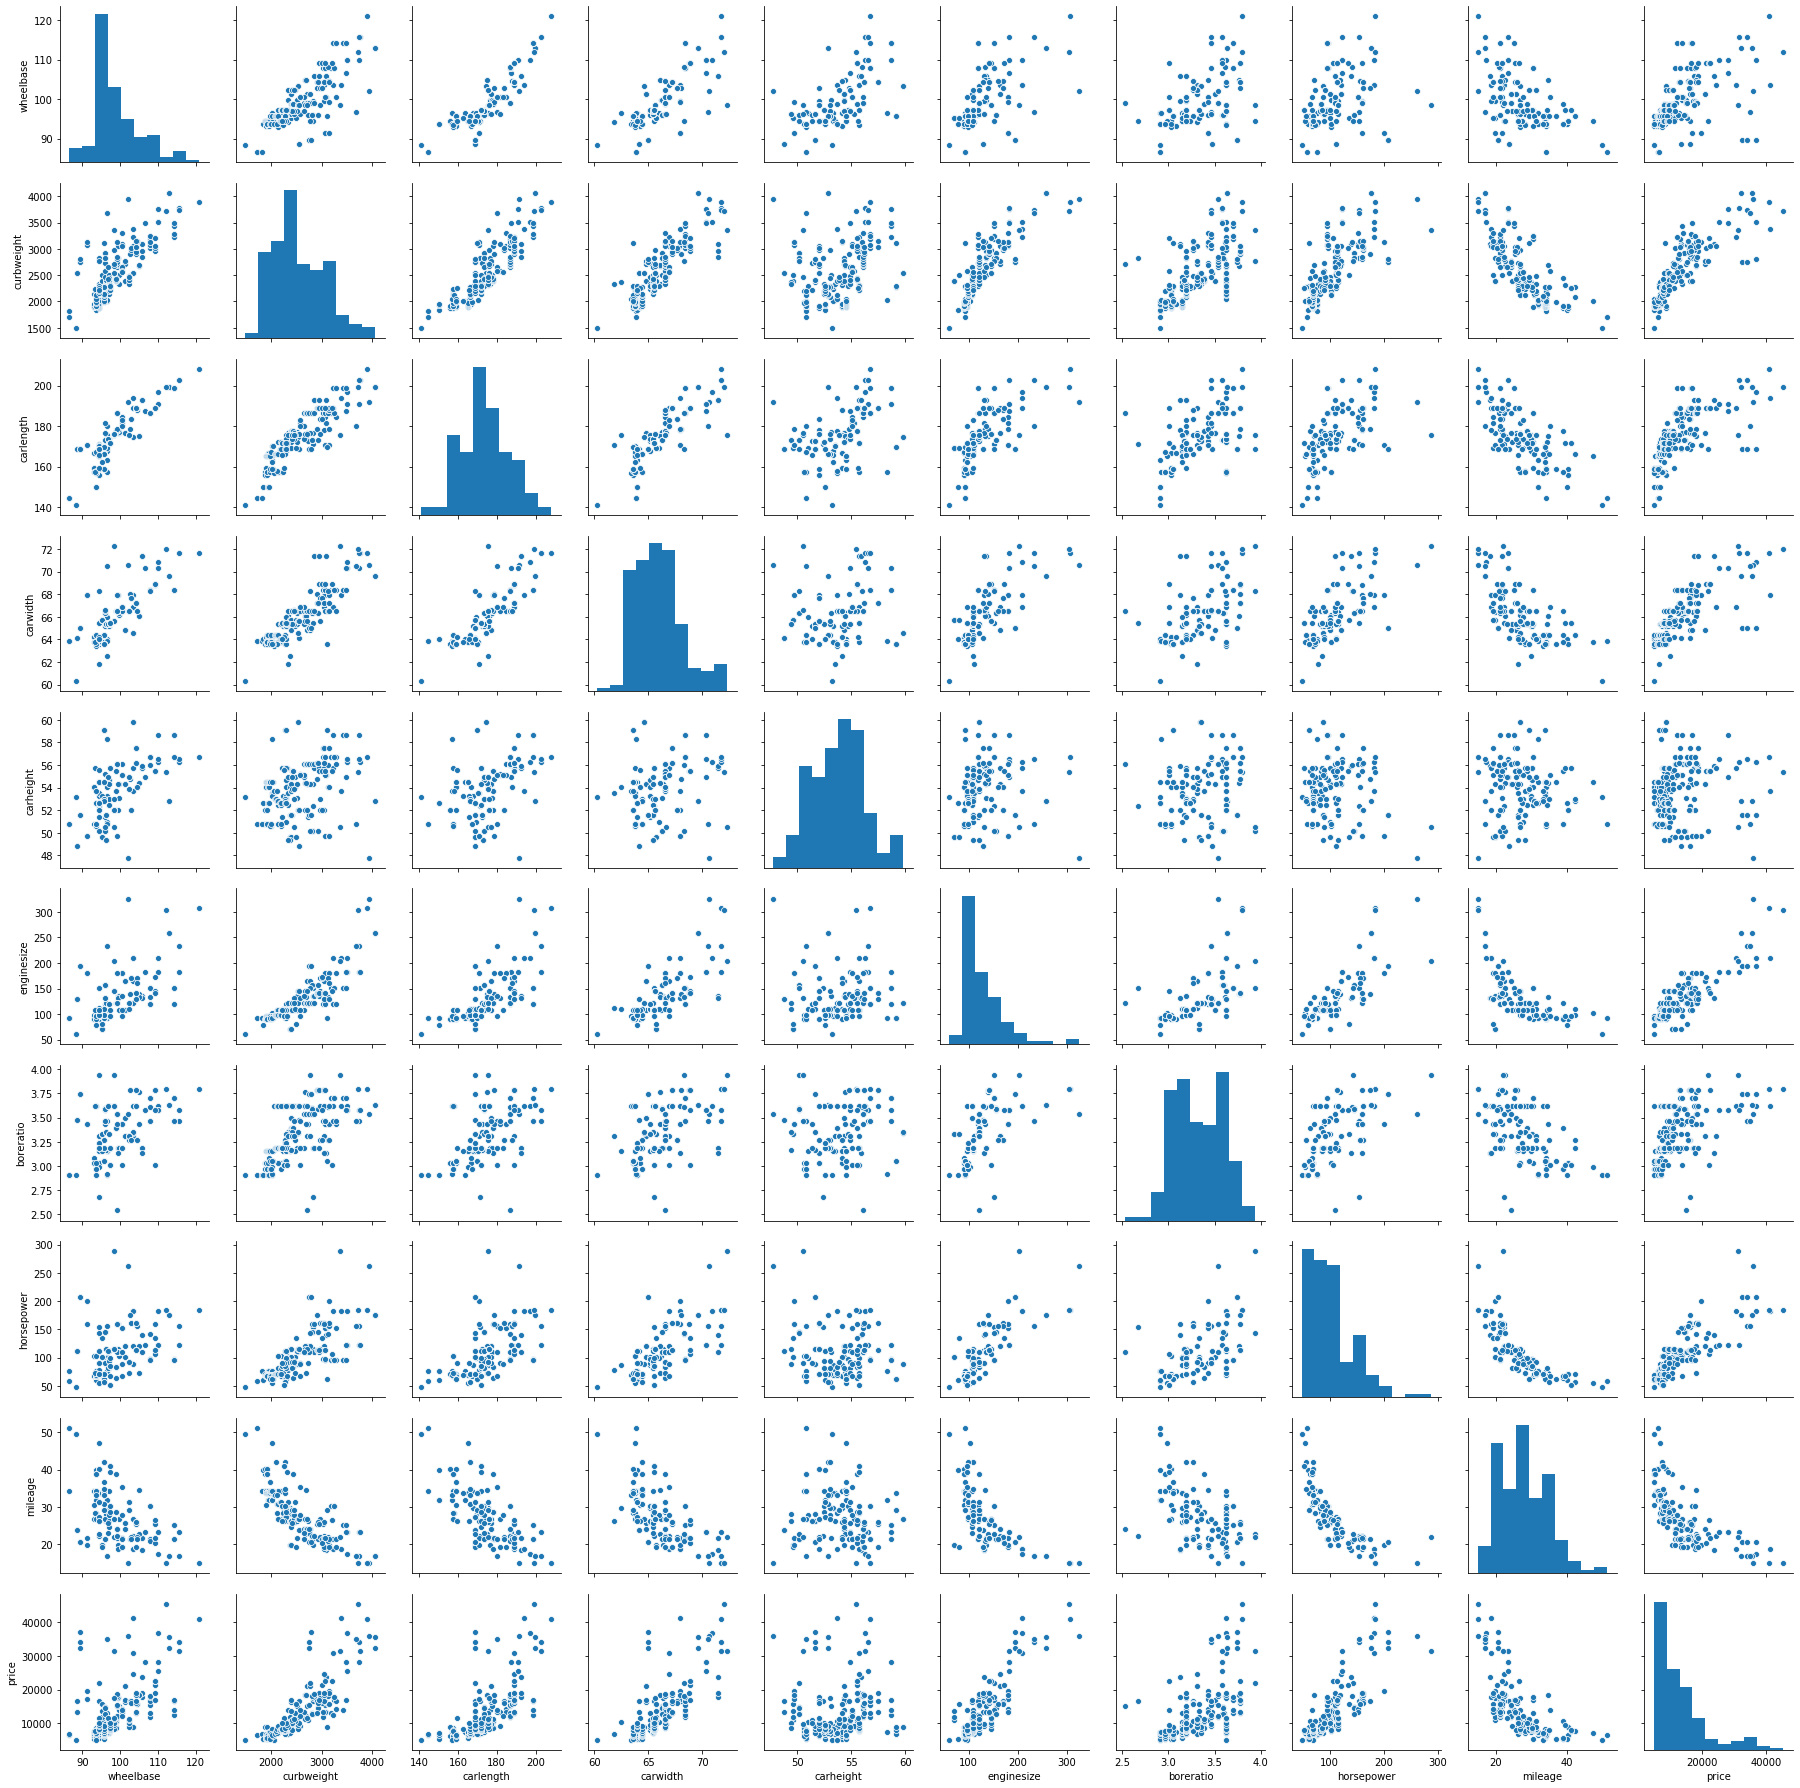

In [29]:
# Visualising the numerical columns using pair plot
plt.figure(figsize=(15,15))
sns.pairplot(price_lr)
plt.show()

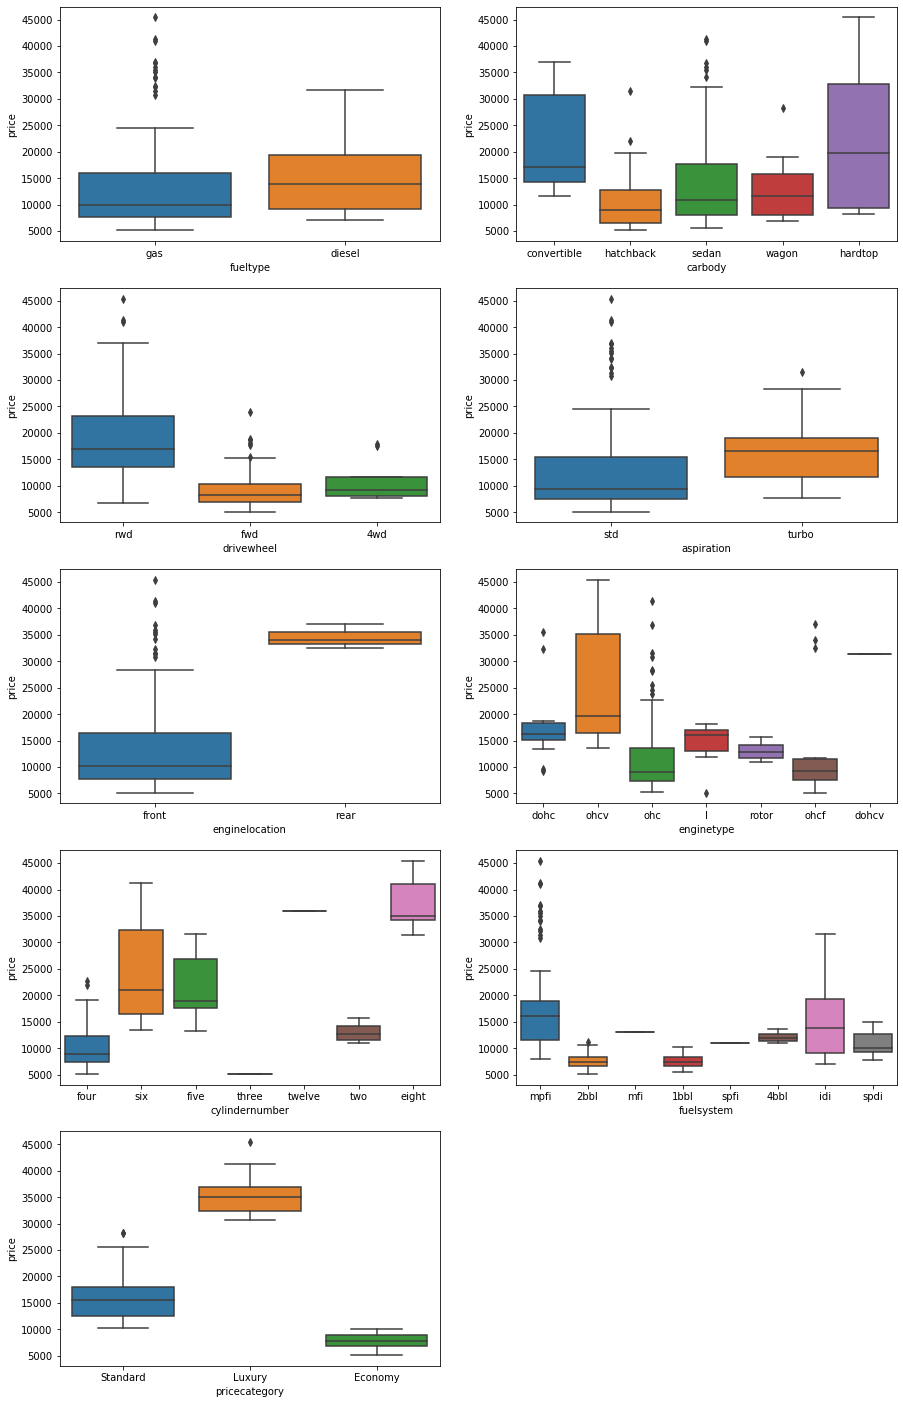

In [30]:
# Plotting box plots for Categorical Variables
plt.figure(figsize=(15,25))
plt.subplot(5,2,1)
sns.boxplot(x='fueltype',y='price',data=price_lr)

plt.subplot(5,2,2)
sns.boxplot(x='carbody',y='price',data=price_lr)

plt.subplot(5,2,3)
sns.boxplot(x='drivewheel',y='price',data=price_lr)

plt.subplot(5,2,4)
sns.boxplot(x='aspiration',y='price',data=price_lr)

plt.subplot(5,2,5)
sns.boxplot(x='enginelocation',y='price',data=price_lr)

plt.subplot(5,2,6)
sns.boxplot(x='enginetype',y='price',data=price_lr)

plt.subplot(5,2,7)
sns.boxplot(x='cylindernumber',y='price',data=price_lr)

plt.subplot(5,2,8)
sns.boxplot(x='fuelsystem',y='price',data=price_lr)

plt.subplot(5,2,9)
sns.boxplot(x='pricecategory',y='price',data=price_lr)

In [31]:
# Creating dummy variables to change categorical variable into numerical variable

In [32]:
cylinder_no = pd.get_dummies(price_lr['cylindernumber'], drop_first = True)
price_lr = pd.concat([price_lr, cylinder_no], axis = 1)

In [33]:
fuel_type = pd.get_dummies(price_lr['fueltype'], drop_first = True)
price_lr = pd.concat([price_lr, fuel_type], axis = 1)

In [34]:
car_body = pd.get_dummies(price_lr['carbody'], drop_first = True)
price_lr = pd.concat([price_lr, car_body], axis = 1)

In [35]:
drive_wheel = pd.get_dummies(price_lr['drivewheel'], drop_first = True)
price_lr = pd.concat([price_lr, drive_wheel], axis = 1)

In [36]:
asp = pd.get_dummies(price_lr['aspiration'], drop_first = True)
price_lr = pd.concat([price_lr, asp], axis = 1)

In [37]:
engine_location = pd.get_dummies(price_lr['enginelocation'], drop_first = True)
price_lr = pd.concat([price_lr, engine_location], axis = 1)

In [38]:
engine_type = pd.get_dummies(price_lr['enginetype'], drop_first = True)
price_lr = pd.concat([price_lr, engine_type], axis = 1)

In [39]:
fuel_system = pd.get_dummies(price_lr['fuelsystem'], drop_first = True)
price_lr = pd.concat([price_lr, fuel_system], axis = 1)

In [40]:
price_category = pd.get_dummies(price_lr['pricecategory'], drop_first = True)
price_lr = pd.concat([price_lr, price_category], axis = 1)

In [41]:
price_lr.head()

,fueltype,carbody,drivewheel,aspiration,enginelocation,enginetype,cylindernumber,fuelsystem,wheelbase,curbweight,carlength,carwidth,carheight,enginesize,boreratio,horsepower,pricecategory,mileage,price,five,four,six,three,twelve,two,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,turbo,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Luxury,Standard
0,gas,convertible,rwd,std,front,dohc,four,mpfi,88.6,2548,168.8,64.1,48.8,130,3.47,111,Standard,23.70,13495.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,gas,convertible,rwd,std,front,dohc,four,mpfi,88.6,2548,168.8,64.1,48.8,130,3.47,111,Standard,23.70,16500.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,gas,hatchback,rwd,std,front,ohcv,six,mpfi,94.5,2823,171.2,65.5,52.4,152,2.68,154,Standard,22.15,16500.0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,gas,sedan,fwd,std,front,ohc,four,mpfi,99.8,2337,176.6,66.2,54.3,109,3.19,102,Standard,26.70,13950.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,gas,sedan,4wd,std,front,ohc,five,mpfi,99.4,2824,176.6,66.4,54.3,136,3.19,115,Standard,19.80,17450.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [42]:
price_lr=price_lr.drop(['fueltype','carbody','drivewheel','aspiration','enginelocation','enginetype','cylindernumber','fuelsystem','pricecategory'],axis=1)

In [43]:
price_lr.head()

,wheelbase,curbweight,carlength,carwidth,carheight,enginesize,boreratio,horsepower,mileage,price,five,four,six,three,twelve,two,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,turbo,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Luxury,Standard
0,88.6,2548,168.8,64.1,48.8,130,3.47,111,23.70,13495.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,88.6,2548,168.8,64.1,48.8,130,3.47,111,23.70,16500.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,94.5,2823,171.2,65.5,52.4,152,2.68,154,22.15,16500.0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,99.8,2337,176.6,66.2,54.3,109,3.19,102,26.70,13950.0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
4,99.4,2824,176.6,66.4,54.3,136,3.19,115,19.80,17450.0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [44]:
#To check the number of rows and columns of the new dataframe created for linear regression
price_lr.shape

(205, 40)

In [45]:
#Splitting data into train data set and test data set
np.random.seed(0)
df_train , df_test = train_test_split(price_lr , train_size = 0.7, random_state = 100)

Due to the dummy variables being either 0 and 1. The other variables are to be scaled to have acomparable scale.

In [46]:
#Feature Scaling using MinMax scaler
scaler = MinMaxScaler()
num_vars=['wheelbase','curbweight','carlength','carwidth','carheight','enginesize','boreratio','horsepower','mileage','price']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [47]:
df_train.head()

,wheelbase,curbweight,carlength,carwidth,carheight,enginesize,boreratio,horsepower,mileage,price,five,four,six,three,twelve,two,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,turbo,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Luxury,Standard
122,0.244828,0.272692,0.426016,0.291667,0.265487,0.139623,0.230159,0.083333,0.530864,0.068818,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
125,0.272414,0.500388,0.452033,0.666667,0.212389,0.339623,1.000000,0.395833,0.213992,0.466890,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
166,0.272414,0.314973,0.448780,0.308333,0.424779,0.139623,0.444444,0.266667,0.344307,0.122110,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.411171,0.450407,0.316667,0.088496,0.260377,0.626984,0.262500,0.244170,0.314446,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
199,0.610345,0.647401,0.775610,0.575000,0.858407,0.260377,0.746032,0.475000,0.122085,0.382131,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1


In [48]:
df_train.describe()

,wheelbase,curbweight,carlength,carwidth,carheight,enginesize,boreratio,horsepower,mileage,price,five,four,six,three,twelve,two,gas,hardtop,hatchback,sedan,wagon,fwd,rwd,turbo,rear,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Luxury,Standard
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.411141,0.407878,0.525476,0.461655,0.509004,0.241351,0.497946,0.227302,0.358265,0.219310,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.909091,0.020979,0.342657,0.475524,0.132867,0.594406,0.349650,0.181818,0.006993,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.069930,0.433566
std,0.205581,0.211269,0.204848,0.184517,0.215378,0.154619,0.207140,0.165511,0.185980,0.215682,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.288490,0.143818,0.476266,0.501156,0.340624,0.492733,0.478536,0.387050,0.083624,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.255926,0.497309
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.272414,0.245539,0.399187,0.304167,0.353982,0.135849,0.305556,0.091667,0.198903,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.341379,0.355702,0.502439,0.425000,0.522124,0.184906,0.500000,0.191667,0.344307,0.140343,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,0.503448,0.559542,0.669919,0.550000,0.668142,0.301887,0.682540,0.283333,0.512346,0.313479,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


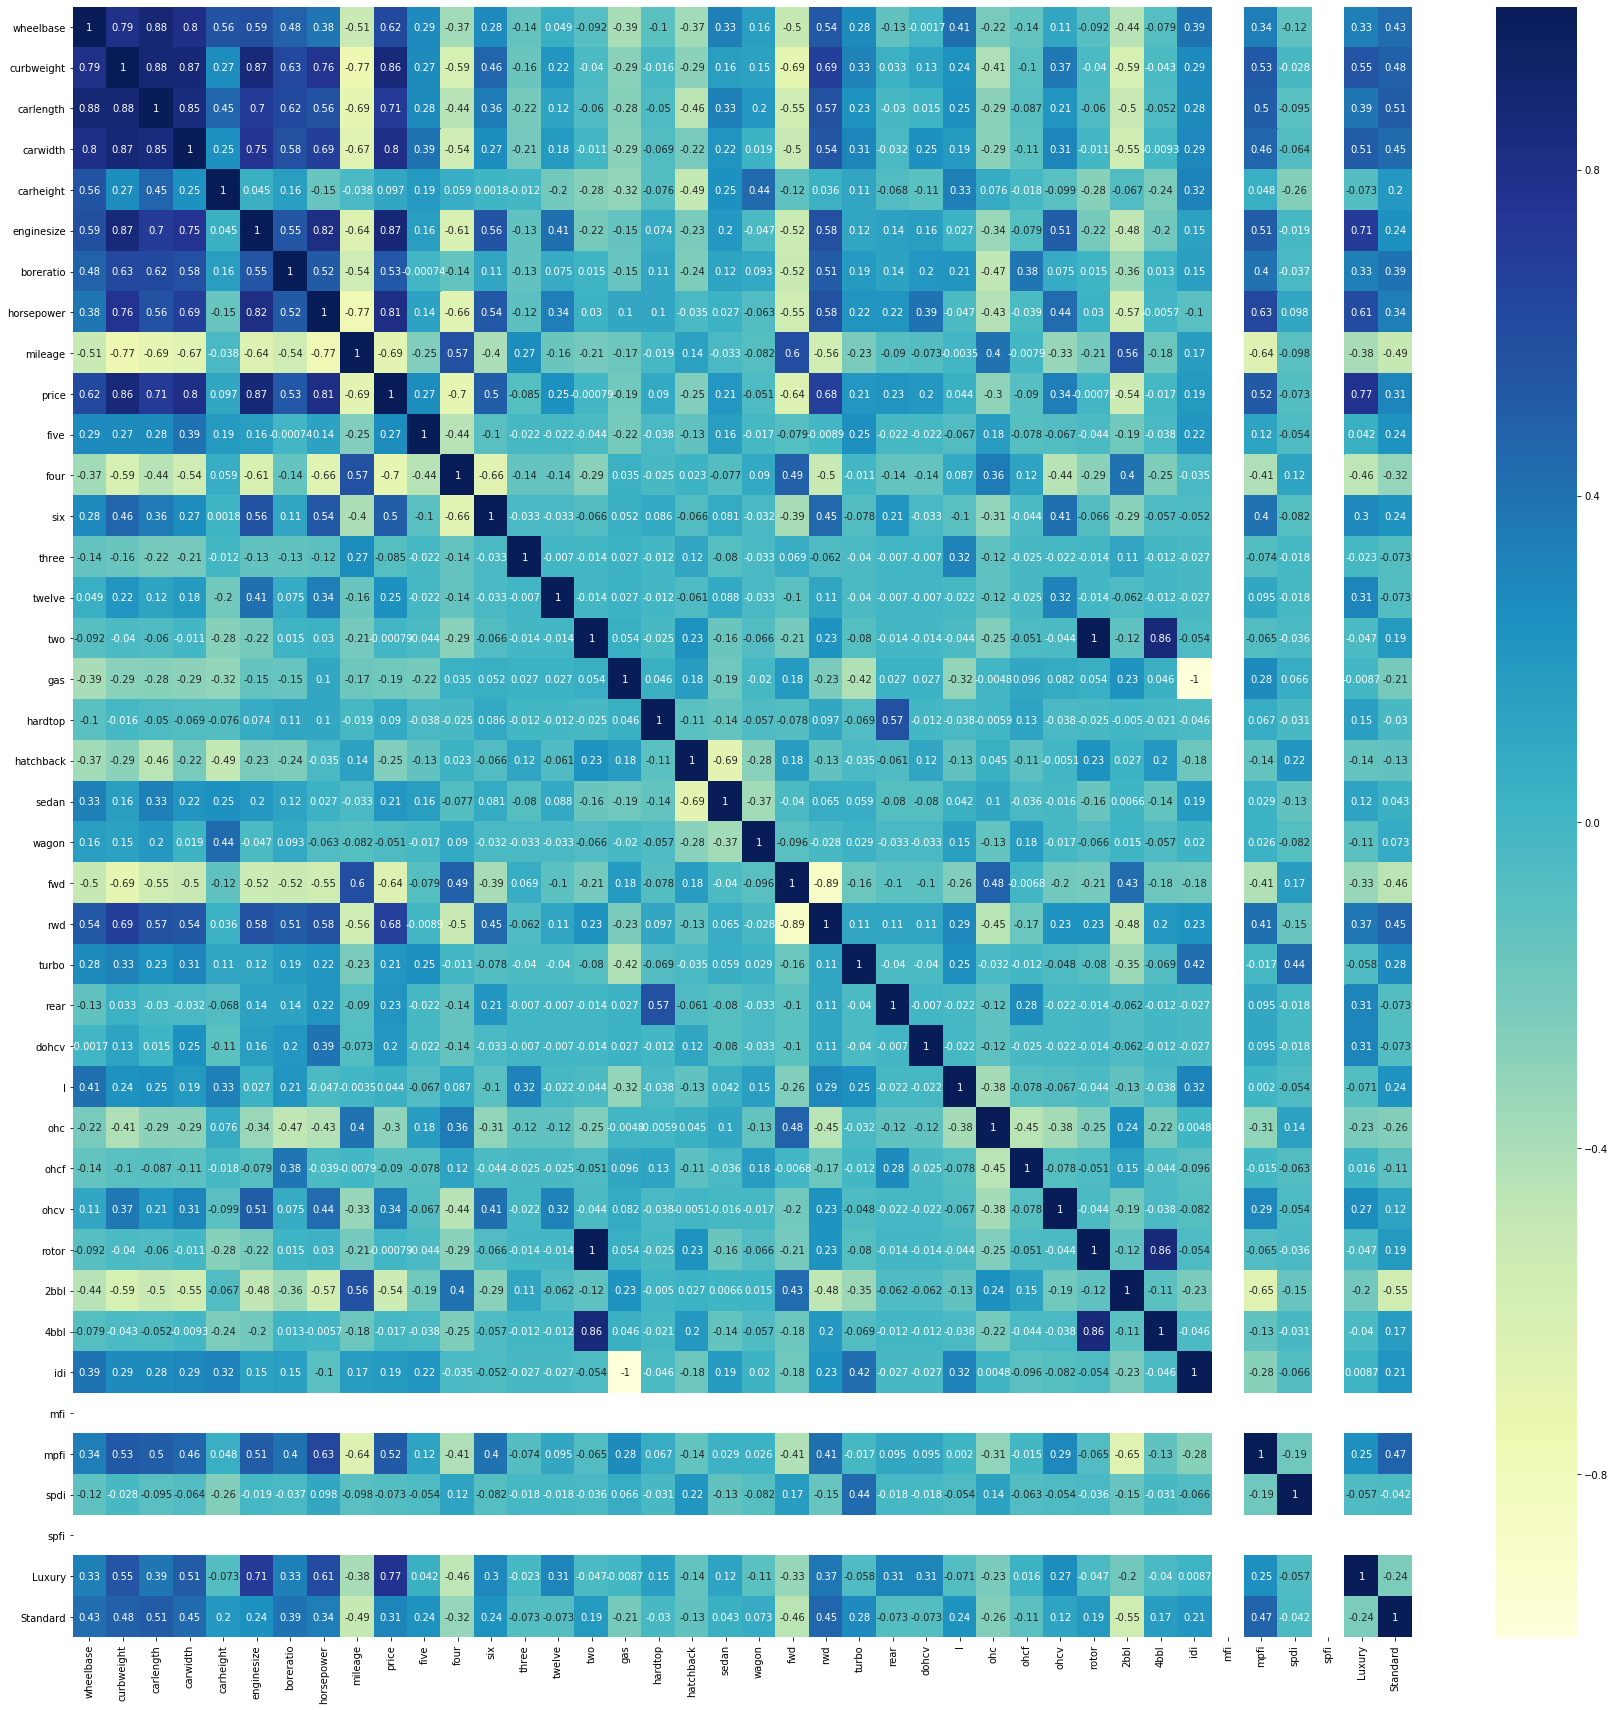

In [49]:
#Correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [50]:
# Dividing data into X and Y
y_train = df_train.pop('price')
X_train = df_train

In [51]:
#Running RFE with the output number of variables equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)
#Running RFE
rfe = RFE(lm,10)
rfe = rfe.fit(X_train,y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 20),
 ('curbweight', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('carheight', False, 23),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('mileage', False, 25),
 ('five', False, 10),
 ('four', True, 1),
 ('six', False, 18),
 ('three', False, 14),
 ('twelve', False, 9),
 ('two', False, 12),
 ('gas', False, 22),
 ('hardtop', False, 5),
 ('hatchback', False, 6),
 ('sedan', False, 8),
 ('wagon', False, 7),
 ('fwd', False, 26),
 ('rwd', True, 1),
 ('turbo', False, 15),
 ('rear', False, 4),
 ('dohcv', True, 1),
 ('l', False, 28),
 ('ohc', False, 3),
 ('ohcf', False, 27),
 ('ohcv', False, 17),
 ('rotor', True, 1),
 ('2bbl', False, 21),
 ('4bbl', False, 11),
 ('idi', False, 19),
 ('mfi', False, 29),
 ('mpfi', False, 24),
 ('spdi', False, 16),
 ('spfi', False, 30),
 ('Luxury', True, 1),
 ('Standard', False, 13)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['curbweight', 'carwidth', 'enginesize', 'boreratio', 'horsepower',
       'four', 'rwd', 'dohcv', 'rotor', 'Luxury'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['wheelbase', 'carlength', 'carheight', 'mileage', 'five', 'six',
       'three', 'twelve', 'two', 'gas', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'turbo', 'rear', 'l', 'ohc', 'ohcf', 'ohcv', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'Standard'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [55]:
#Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
#Adding a constant variable
X_train_rfe= sm.add_constant(X_train_rfe)

In [57]:
#Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [58]:
#Summary of the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     154.0
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.09e-67
Time:                        18:37:14   Log-Likelihood:                 198.50
No. Observations:                 143   AIC:                            -375.0
Df Residuals:                     132   BIC:                            -342.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0350      0.030      1.185      0.2

In [59]:
#Calculating VIF for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.64
3,enginesize,11.66
1,curbweight,10.09
5,horsepower,5.00
2,carwidth,4.94
6,four,3.31
10,Luxury,2.49
4,boreratio,2.41
7,rwd,2.38
9,rotor,2.22


In [60]:
#dropping enginesize due to high p-value and VIF
X_train_new = X_train_rfe.drop(['enginesize'],axis=1) 

In [61]:
#Adding a constant variable and creating a new model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.6
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           3.25e-68
Time:                        18:37:18   Log-Likelihood:                 197.00
No. Observations:                 143   AIC:                            -374.0
Df Residuals:                     133   BIC:                            -344.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0184      0.028      0.655      0.5

In [62]:
#Removing boreratio due to high p-value
X_train_new1=X_train_new.drop(['boreratio'],axis=1)

In [63]:
#Adding a constant variable
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     187.8
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           6.56e-69
Time:                        18:37:20   Log-Likelihood:                 195.86
No. Observations:                 143   AIC:                            -373.7
Df Residuals:                     134   BIC:                            -347.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.028      0.466      0.6

In [64]:
#Dropping curbweight due to high p -value and creating a new model

X_train_new2=X_train_new1.drop(['curbweight'],axis=1)
X_train_lm = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     209.6
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           2.90e-69
Time:                        18:37:22   Log-Likelihood:                 193.83
No. Observations:                 143   AIC:                            -371.7
Df Residuals:                     135   BIC:                            -348.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0149      0.028      0.530      0.5

In [65]:
# Dropping the feature const from the dataframe
X_train_new2=X_train_new2.drop(['const'],axis=1)

In [66]:
#Since all the p-values are less than 0.05, we will check for the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carwidth,10.47
1,horsepower,8.15
2,four,2.93
3,rwd,2.69
6,Luxury,1.81
4,dohcv,1.21
5,rotor,1.13


In [67]:
#Removing carwidth due to high VIF value and rebuilding the model
X_train_new3=X_train_new2.drop(['carwidth'],axis=1)
X_train_lm = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     156.1
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.92e-58
Time:                        18:37:27   Log-Likelihood:                 164.60
No. Observations:                 143   AIC:                            -315.2
Df Residuals:                     136   BIC:                            -294.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1476      0.028      5.217      0.0

In [68]:
#Since all the p-values are less than 0.05, we will check for the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,4.03
2,rwd,2.56
5,Luxury,1.79
1,four,1.64
3,dohcv,1.18
4,rotor,1.13


### Residual Analysis of the train data

In [69]:
# Need to check if the errors are also normally distributed
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

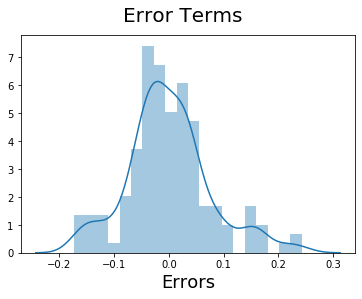

In [70]:
#Plotting distribution plot for the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price),bins=20)
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Errors',fontsize=18)

### Making predictions
Applying the scaling on the test dataset

In [71]:
#Scaling the test set
num_vars=['wheelbase','curbweight','carlength','carwidth','carheight','enginesize','boreratio','horsepower','mileage','price']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [72]:
y_test = df_test.pop('price')
X_test = df_test

In [73]:
#Creating X_test_new containing only those columns which were used to train dataset
X_test_new = X_test[['horsepower','four','rwd','dohcv','rotor','Luxury']]

In [74]:
#Adding a constant to the X test
X_test_new = sm.add_constant(X_test_new)

In [75]:
#Predicting y based on X test data set
y_pred = lm.predict(X_test_new)

In [76]:
#Calculating r2 score between y_test and y_pred
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8507828300372864

### Model Evaluation

Text(0, 0.5, 'y_pred')

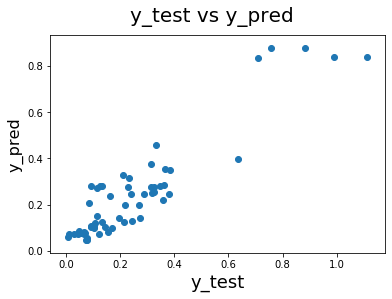

In [77]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

We can see that the best fitted line is provided by the equation:

##### price = 0.3857*horsepower - 0.1060*four + 0.1285*rwd - 0.2791*dohcv -0.1567*rotor + 0.3434*Luxury

In [78]:
pickle.dump(lm,open('model.pkl','wb'))

In [81]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
print(model.predict([[0.5,0.5,0.5,0.5,0.5,0.5]]))